In [31]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [ ]:
# Import necessary library
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/gdrive')

# Unzip the file
!unzip "/content/gdrive/My Drive/hagridset.zip" -d "/content/gdrive/My Drive/"


Streaming output truncated to the last 5000 lines.
  inflating: /content/gdrive/My Drive/hagridset/two_up_inverted/47edfc89-d101-4c65-b08e-5fa905185d3c.jpeg  
  inflating: /content/gdrive/My Drive/hagridset/two_up_inverted/47fbc898-db8a-4876-adcc-45830140c5f4.jpeg  
  inflating: /content/gdrive/My Drive/hagridset/two_up_inverted/4808d7e7-b192-4ecf-b41d-22e0400eaaa8.jpeg  
  inflating: /content/gdrive/My Drive/hagridset/two_up_inverted/4813ea1b-3cae-4a76-ac2d-f599f4b7cfaf.jpeg  
  inflating: /content/gdrive/My Drive/hagridset/two_up_inverted/48174f09-1f91-4aa7-801f-e157d7a2166c.jpeg  
  inflating: /content/gdrive/My Drive/hagridset/two_up_inverted/48195716-7d38-41a6-87c5-01df243164c2.jpeg  
  inflating: /content/gdrive/My Drive/hagridset/two_up_inverted/48227c67-4404-4528-b410-52b4f85e9070.jpeg  
  inflating: /content/gdrive/My Drive/hagridset/two_up_inverted/4836a54f-9cb9-432f-b73e-a7ae25028ae4.jpeg  
  inflating: /content/gdrive/My Drive/hagridset/two_up_inverted/4840ec6d-01cb-4c6f-be

Simple CNN Model

In [ ]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory
# Import necessary library
from google.colab import drive

# Set the random seed for reproducibility
student_id_seed = 393110
tf.random.set_seed(student_id_seed)

# Path to your dataset directory
dataset_path = '/content/gdrive/My Drive/hagridset'

# Extract class names
class_names = sorted(os.listdir(dataset_path))
print(f'Class names: {class_names}')
num_classes = len(class_names)

# Load the dataset using image_dataset_from_directory
full_dataset = image_dataset_from_directory(
    dataset_path,
    image_size=(128, 128),
    batch_size=32,
    color_mode='rgb',
    seed=student_id_seed,
    shuffle=True,
)

Class names: ['call', 'deleted_img_ids.txt', 'dislike', 'fist', 'four', 'like', 'mute', 'ok', 'one', 'palm', 'peace', 'peace_inverted', 'rock', 'stop', 'stop_inverted', 'three', 'three2', 'two_up', 'two_up_inverted']
Found 125912 files belonging to 18 classes.


In [ ]:
# Calculate the number of batches
dataset_size = full_dataset.cardinality().numpy()
train_size = int(0.7 * dataset_size)
val_size = int(0.1 * dataset_size)
test_size = int(0.2 * dataset_size)

# Split the dataset
train_dataset = full_dataset.take(train_size)
val_test_dataset = full_dataset.skip(train_size)
val_dataset = val_test_dataset.take(val_size)
test_dataset = val_test_dataset.skip(val_size)

# Optimize the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Define a simple CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
   tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=val_dataset
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_dataset)
print(f'Test accuracy: {test_acc:.4f}')

# Save the model
model.save('/content/gdrive/My Drive/model/model4.h5')



Epoch 1/20
2754/2754 [==============================] - 366s 131ms/step - loss: 3.1022 - accuracy: 0.0607 - val_loss: 2.8915 - val_accuracy: 0.0534
Epoch 2/20
2754/2754 [==============================] - 255s 92ms/step - loss: 2.8954 - accuracy: 0.0582 - val_loss: 2.8910 - val_accuracy: 0.0578
Epoch 3/20
2754/2754 [==============================] - 255s 92ms/step - loss: 2.8915 - accuracy: 0.0581 - val_loss: 2.8918 - val_accuracy: 0.0586
Epoch 4/20
2754/2754 [==============================] - 255s 92ms/step - loss: 2.8881 - accuracy: 0.0587 - val_loss: 2.8923 - val_accuracy: 0.0580
Epoch 5/20
2754/2754 [==============================] - 255s 92ms/step - loss: 2.8906 - accuracy: 0.0580 - val_loss: 2.8943 - val_accuracy: 0.0584
Epoch 6/20
2754/2754 [==============================] - 256s 93ms/step - loss: 2.8869 - accuracy: 0.0602 - val_loss: 2.9001 - val_accuracy: 0.0584
Epoch 7/20
2754/2754 [==============================] - 253s 92ms/step - loss: 2.8855 - accuracy: 0.0594 - val_loss: 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


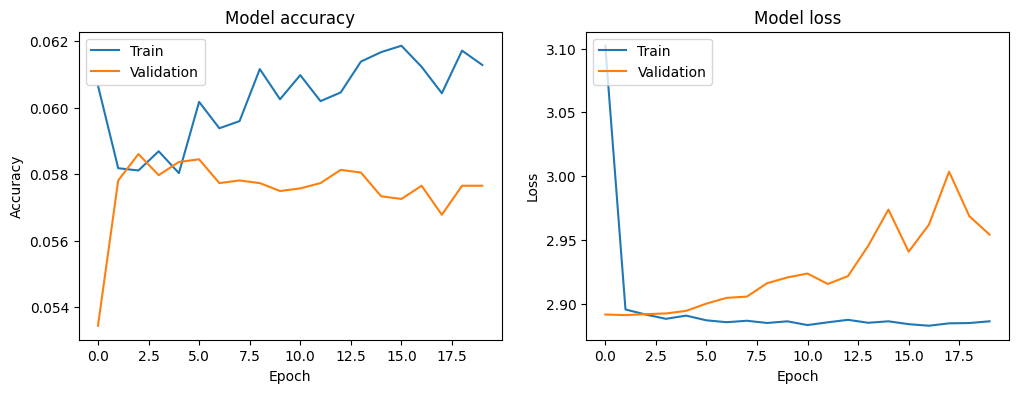

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


Basic VGG-16 Model

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential

# Load the VGG16 model pre-trained on ImageNet, excluding the top layers
base_model = VGG16(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model

# Create the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

# Train the model
history = model.fit(
    train_dataset,
    epochs=15,
    validation_data=val_dataset
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_dataset)
print(f'Test accuracy: {test_acc:.4f}')

# Save the model
model.save('/content/gdrive/My Drive/model/model7.h5')


58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 19)                9747      
                                                                 
Total params: 14987091 (57.17 MB)
Trainable params: 272

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# This will prompt for authorization.
drive.mount('/content/gdrive')
# Save the model
model.save('/content/gdrive/My Drive/model/model7.h5')

Mounted at /content/gdrive


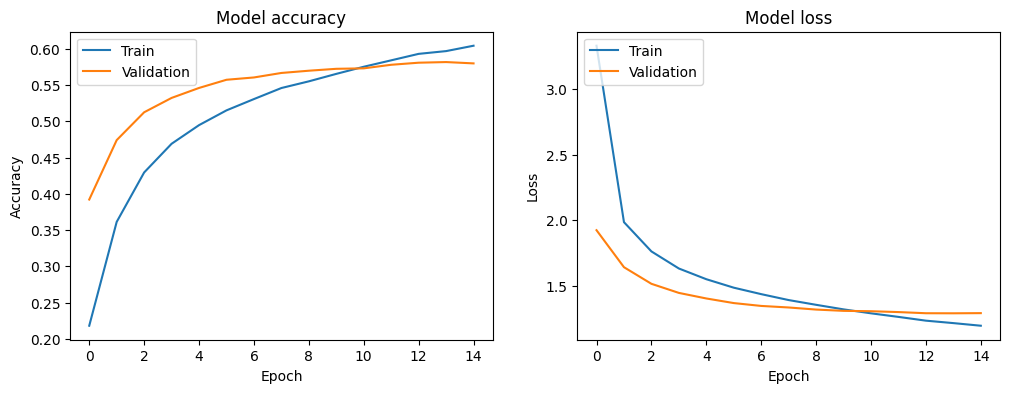

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


Deep CNN

In [ ]:
from google.colab import drive
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import os

# Unmount and remount Google Drive
drive.flush_and_unmount()
drive.mount('/content/gdrive')

# Set the random seed for reproducibility
student_id_seed = 393110
tf.random.set_seed(student_id_seed)

# Path to your dataset directory
dataset_path = '/content/gdrive/My Drive/hagridset'

# Extract class names
class_names = sorted(os.listdir(dataset_path))
print(f'Class names: {class_names}')
num_classes = len(class_names)

# Load the dataset using image_dataset_from_directory with a different batch size
batch_size = 32  # New batch size
full_dataset = image_dataset_from_directory(
    dataset_path,
    image_size=(128, 128),
    batch_size=batch_size,
    color_mode='rgb',
    seed=student_id_seed,
    shuffle=True,
)


Mounted at /content/gdrive
Class names: ['call', 'deleted_img_ids.txt', 'dislike', 'fist', 'four', 'like', 'mute', 'ok', 'one', 'palm', 'peace', 'peace_inverted', 'rock', 'stop', 'stop_inverted', 'three', 'three2', 'two_up', 'two_up_inverted']
Found 112845 files belonging to 18 classes.


In [ ]:
# Calculate the number of batches
dataset_size = full_dataset.cardinality().numpy()
train_size = int(0.7 * dataset_size)
val_size = int(0.1 * dataset_size)
test_size = int(0.2 * dataset_size)

# Split the dataset
train_dataset = full_dataset.take(train_size)
val_test_dataset = full_dataset.skip(train_size)
val_dataset = val_test_dataset.take(val_size)
test_dataset = val_test_dataset.skip(val_size)

# Print dataset sizes
print(f"Training dataset size: {train_size} samples")
print(f"Validation dataset size: {val_size} samples")
print(f"Test dataset size: {test_size} samples")

# Optimize the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

Training dataset size: 2468 samples
Validation dataset size: 352 samples
Test dataset size: 705 samples


Epoch 1/15
2468/2468 [==============================] - 271s 108ms/step - loss: 2.1194 - accuracy: 0.3594 - val_loss: 1.3754 - val_accuracy: 0.5621
Epoch 2/15
2468/2468 [==============================] - 201s 81ms/step - loss: 0.9997 - accuracy: 0.6730 - val_loss: 0.8499 - val_accuracy: 0.7180
Epoch 3/15
2468/2468 [==============================] - 201s 81ms/step - loss: 0.6182 - accuracy: 0.7966 - val_loss: 0.5428 - val_accuracy: 0.8264
Epoch 4/15
2468/2468 [==============================] - 201s 81ms/step - loss: 0.4126 - accuracy: 0.8624 - val_loss: 0.4512 - val_accuracy: 0.8528
Epoch 5/15
2468/2468 [==============================] - 202s 82ms/step - loss: 0.2890 - accuracy: 0.9030 - val_loss: 0.3952 - val_accuracy: 0.8760
Epoch 6/15
2468/2468 [==============================] - 202s 82ms/step - loss: 0.1973 - accuracy: 0.9343 - val_loss: 0.3794 - val_accuracy: 0.8813
Epoch 7/15
2468/2468 [==============================] - 202s 82ms/step - loss: 0.1389 - accuracy: 0.9527 - val_loss: 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


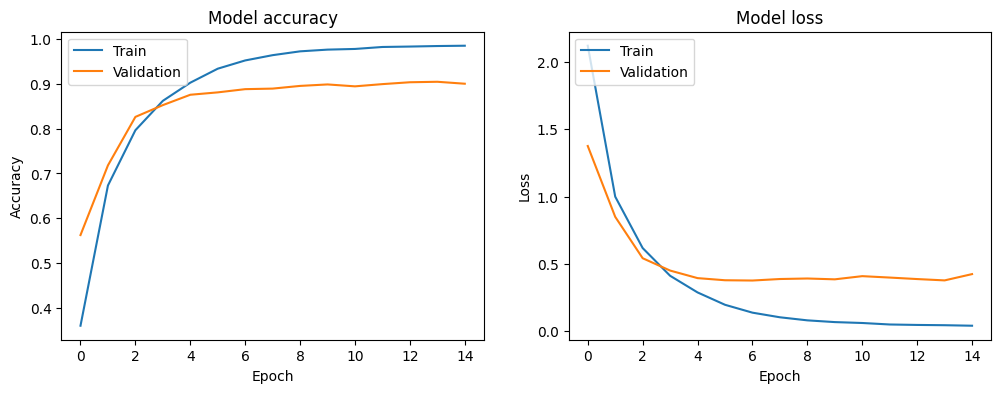

In [ ]:
from tensorflow.keras import layers, models, optimizers, Sequential
import matplotlib.pyplot as plt

input_shape=(128,128,3)


model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    # Third Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    # Fourth Convolutional Block
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    # Fifth Convolutional Block
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    # Dense Layers
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.build((None, *input_shape))  # None indicates batch size can be any

# Assuming train_dataset and val_dataset are predefined and valid
history = model.fit(
    train_dataset,
    epochs=15,
    validation_data=val_dataset
)

# Save the model
model.save('/content/gdrive/My Drive/model/custom_cnn_with_augmentation.h5') #dont mind naming, this wasnt used cnn.

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:
from google.colab import drive
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import os

# Unmount and remount Google Drive
drive.flush_and_unmount()
drive.mount('/content/gdrive')

# Set the random seed for reproducibility
student_id_seed = 393110
tf.random.set_seed(student_id_seed)

# Path to your dataset directory
dataset_path = '/content/gdrive/My Drive/hagridset'

# Extract class names
class_names = sorted(os.listdir(dataset_path))
print(f'Class names: {class_names}')
num_classes = len(class_names)


Mounted at /content/gdrive
Class names: ['call', 'deleted_img_ids.txt', 'dislike', 'fist', 'four', 'like', 'mute', 'ok', 'one', 'palm', 'peace', 'peace_inverted', 'rock', 'stop', 'stop_inverted', 'three', 'three2', 'two_up', 'two_up_inverted']


Deep Learning Model with grey scale

In [ ]:
# Load the dataset using image_dataset_from_directory
full_dataset = image_dataset_from_directory(
    dataset_path,
    image_size=(128, 128),
    batch_size=32,
    color_mode='grayscale',
    seed=student_id_seed,
)


Found 112845 files belonging to 18 classes.


In [ ]:
# Calculate the number of batches
dataset_size = full_dataset.cardinality().numpy()
train_size = int(0.7 * dataset_size)
val_size = int(0.1 * dataset_size)
test_size = int(0.2 * dataset_size)

# Split the dataset
train_dataset = full_dataset.take(train_size)
val_test_dataset = full_dataset.skip(train_size)
val_dataset = val_test_dataset.take(val_size)
test_dataset = val_test_dataset.skip(val_size)

# Print dataset sizes
print(f"Training dataset size: {train_size} samples")
print(f"Validation dataset size: {val_size} samples")
print(f"Test dataset size: {test_size} samples")

# Optimize the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

Training dataset size: 2468 samples
Validation dataset size: 352 samples
Test dataset size: 705 samples


Epoch 1/10
2468/2468 [==============================] - 6691s 3s/step - loss: 2.5967 - accuracy: 0.2410 - val_loss: 1.8629 - val_accuracy: 0.4193
Epoch 2/10
2468/2468 [==============================] - 203s 82ms/step - loss: 1.7634 - accuracy: 0.4427 - val_loss: 1.4003 - val_accuracy: 0.5552
Epoch 3/10
2468/2468 [==============================] - 203s 82ms/step - loss: 1.3421 - accuracy: 0.5629 - val_loss: 1.1256 - val_accuracy: 0.6378
Epoch 4/10
2468/2468 [==============================] - 202s 82ms/step - loss: 1.0413 - accuracy: 0.6548 - val_loss: 0.9389 - val_accuracy: 0.6970
Epoch 5/10
2468/2468 [==============================] - 202s 82ms/step - loss: 0.8165 - accuracy: 0.7299 - val_loss: 0.8409 - val_accuracy: 0.7321
Epoch 6/10
2468/2468 [==============================] - 203s 82ms/step - loss: 0.6396 - accuracy: 0.7852 - val_loss: 0.7606 - val_accuracy: 0.7590
Epoch 7/10
2468/2468 [==============================] - 204s 82ms/step - loss: 0.5029 - accuracy: 0.8310 - val_loss: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


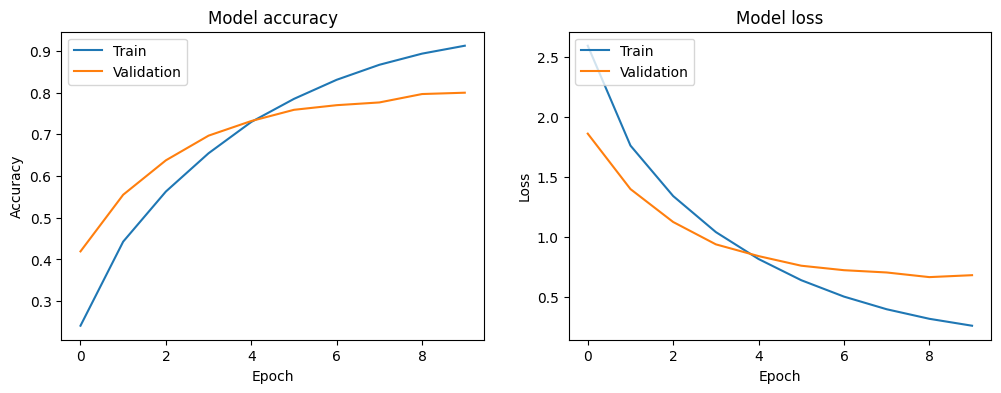

In [ ]:
from tensorflow.keras import optimizers, models, layers

input_shape = (128, 128, 1)  # Keep the input shape as grayscale if that's your data format

model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    # Third Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    # Fourth Convolutional Block
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    # Flattening the convolutions
    layers.Flatten(),

    # Dense Layer
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),

    # Output Layer
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, validation_data=val_dataset, epochs=10)
model.save('/content/gdrive/My Drive/model/grey_scale_cnn.h5')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


CNN with data augmentation

In [ ]:
# Load the dataset using image_dataset_from_directory with a different batch size
batch_size = 32  # New batch size
full_dataset = image_dataset_from_directory(
    dataset_path,
    image_size=(128, 128),
    batch_size=batch_size,
    color_mode='rgb',
    seed=student_id_seed,
    shuffle=True,
)

Found 112845 files belonging to 18 classes.


In [ ]:
# Calculate the number of batches
dataset_size = full_dataset.cardinality().numpy()
train_size = int(0.7 * dataset_size)
val_size = int(0.1 * dataset_size)
test_size = int(0.2 * dataset_size)

# Split the dataset
train_dataset = full_dataset.take(train_size)
val_test_dataset = full_dataset.skip(train_size)
val_dataset = val_test_dataset.take(val_size)
test_dataset = val_test_dataset.skip(val_size)

# Print dataset sizes
print(f"Training dataset size: {train_size} samples")
print(f"Validation dataset size: {val_size} samples")
print(f"Test dataset size: {test_size} samples")

# Define the preprocess and augment functions
def preprocess(image, label):
    # Normalize to [0, 1]
    image = image / 255.0
    return image, label

def augment(image, label):
    # Data augmentation transformations
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)
    # Additional rotation
    image = tf.image.rot90(image, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
    return image, label

# Apply preprocessing and augmentation
train_dataset = train_dataset.map(preprocess).map(augment, num_parallel_calls=tf.data.AUTOTUNE)
val_dataset = val_dataset.map(preprocess)
test_dataset = test_dataset.map(preprocess)

# No need to batch again if already batched
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)


Training dataset size: 2468 samples
Validation dataset size: 352 samples
Test dataset size: 705 samples


Epoch 1/15
2468/2468 [==============================] - 208s 83ms/step - loss: 2.9953 - accuracy: 0.1072 - val_loss: 2.6216 - val_accuracy: 0.1747
Epoch 2/15
2468/2468 [==============================] - 207s 84ms/step - loss: 2.6165 - accuracy: 0.1743 - val_loss: 2.3782 - val_accuracy: 0.2503
Epoch 3/15
2468/2468 [==============================] - 207s 84ms/step - loss: 2.3479 - accuracy: 0.2506 - val_loss: 2.1312 - val_accuracy: 0.3358
Epoch 4/15
2468/2468 [==============================] - 207s 84ms/step - loss: 2.0947 - accuracy: 0.3256 - val_loss: 1.9178 - val_accuracy: 0.3954
Epoch 5/15
2468/2468 [==============================] - 208s 84ms/step - loss: 1.8701 - accuracy: 0.3973 - val_loss: 1.6959 - val_accuracy: 0.4655
Epoch 6/15
2468/2468 [==============================] - 207s 84ms/step - loss: 1.6725 - accuracy: 0.4577 - val_loss: 1.5147 - val_accuracy: 0.5329
Epoch 7/15
2468/2468 [==============================] - 207s 84ms/step - loss: 1.5181 - accuracy: 0.5086 - val_loss: 1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


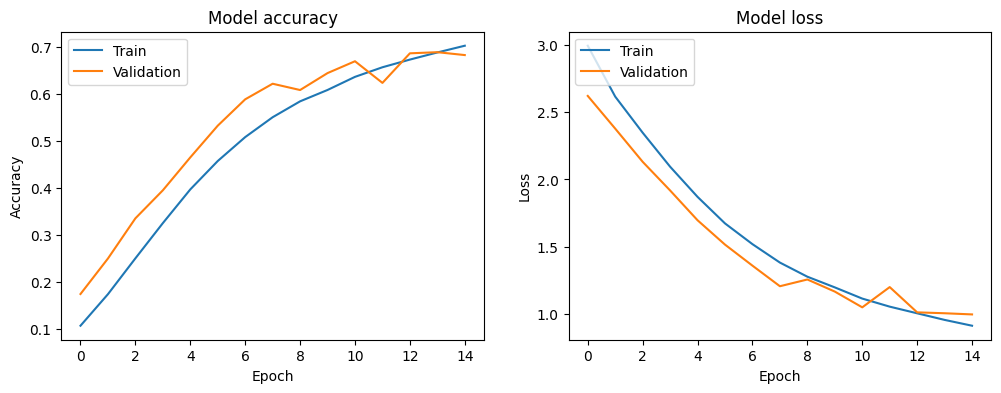

In [ ]:
# Model setup
model_data_aug = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    # Third Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    # Fourth Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    # Dense Layers
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])


model_data_aug.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model_data_aug.fit(
    train_dataset,
    epochs=15,
    validation_data=val_dataset
)

model.save('/content/gdrive/My Drive/model/data_aug_with_deep_cnn.h5')

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [2]:
import pandas as pd

# Data for the Inference Time Comparison table
inference_data = {
    'Model': [
        'CNN from Scratch (Color)',
        'Transfer Learning with VGG16',
        'CNN with Deeper Architecture',
        'CNN from Scratch (Grayscale)',
        'CNN with Data Augmentation (Color)'
    ],
    'Average Time per Epoch (seconds)': [
        72.2,
        '252-258',
        202,
        203,
        207
    ]
}

# Data for the Performance Metrics Comparison table
performance_data = {
    'Model': [
        'CNN from Scratch (Color)',
        'Transfer Learning with VGG16',
        'CNN with Deeper Architecture',
        'CNN from Scratch (Grayscale)',
        'CNN with Data Augmentation (Color)'
    ],
    'Training Accuracy': [
        '74.58%',
        '60.43%',
        '98.57%',
        '91.27%',
        '70.31%'
    ],
    'Validation Accuracy': [
        '76.45%',
        '57.99%',
        '90.07%',
        '80.00%',
        '68.32%'
    ],
    'Training Loss': [
        0.7703,
        1.1942,
        0.0420,
        0.2598,
        0.9110
    ],
    'Validation Loss': [
        0.7582,
        1.2902,
        0.4250,
        0.6816,
        0.9952
    ]
}

# Create pandas DataFrames
inference_df = pd.DataFrame(inference_data)
performance_df = pd.DataFrame(performance_data)

# Print the tables
print("Inference Time Comparison")
print(inference_df)

print("\nPerformance Metrics Comparison")
print(performance_df)


Inference Time Comparison
                                Model Average Time per Epoch (seconds)
0            CNN from Scratch (Color)                             72.2
1        Transfer Learning with VGG16                          252-258
2        CNN with Deeper Architecture                              202
3        CNN from Scratch (Grayscale)                              203
4  CNN with Data Augmentation (Color)                              207

Performance Metrics Comparison
                                Model Training Accuracy Validation Accuracy  \
0            CNN from Scratch (Color)            74.58%              76.45%   
1        Transfer Learning with VGG16            60.43%              57.99%   
2        CNN with Deeper Architecture            98.57%              90.07%   
3        CNN from Scratch (Grayscale)            91.27%              80.00%   
4  CNN with Data Augmentation (Color)            70.31%              68.32%   

   Training Loss  Validation Loss  
0    

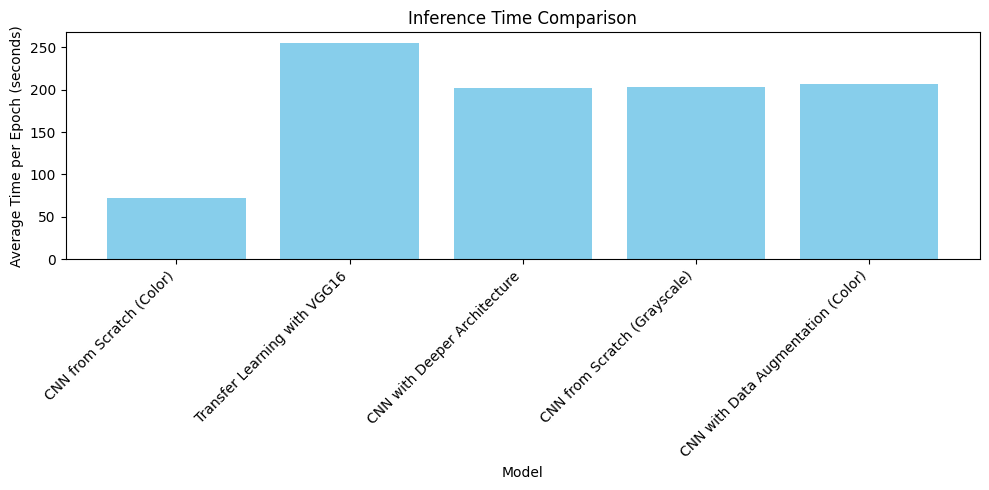

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the Inference Time Comparison
models = ['CNN from Scratch (Color)', 'Transfer Learning with VGG16', 'CNN with Deeper Architecture', 'CNN from Scratch (Grayscale)', 'CNN with Data Augmentation (Color)']
inference_times = [72.2, 255, 202, 203, 207]  # Using the midpoint of the range for VGG16


# Plot Inference Time Comparison
plt.figure(figsize=(10, 5))
plt.bar(models, inference_times, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Average Time per Epoch (seconds)')
plt.title('Inference Time Comparison')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



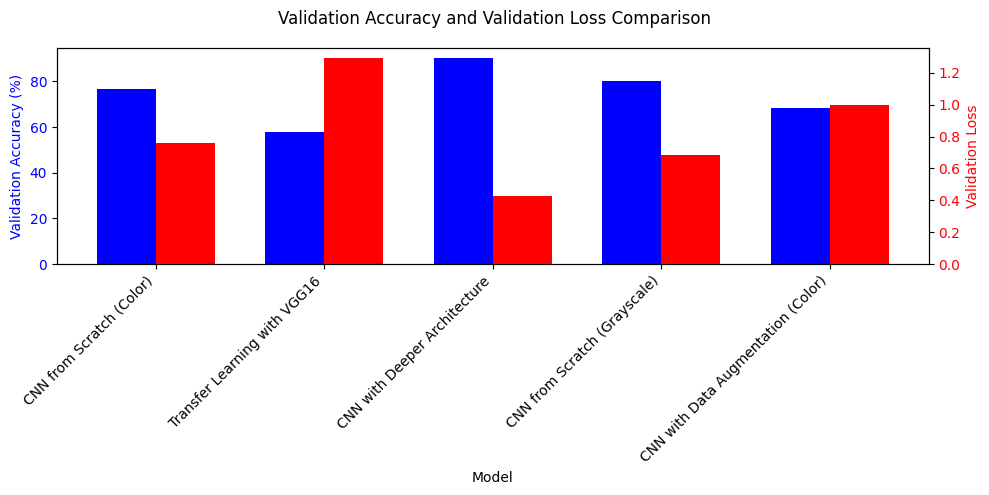

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the Performance Metrics Comparison
models = ['CNN from Scratch (Color)', 'Transfer Learning with VGG16', 'CNN with Deeper Architecture', 'CNN from Scratch (Grayscale)', 'CNN with Data Augmentation (Color)']
validation_accuracy = [76.45, 57.99, 90.07, 80.00, 68.32]
validation_loss = [0.7582, 1.2902, 0.4250, 0.6816, 0.9952]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Validation Accuracy
rects1 = ax1.bar(x - width/2, validation_accuracy, width, label='Validation Accuracy', color='b')
ax1.set_xlabel('Model')
ax1.set_ylabel('Validation Accuracy (%)', color='b')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45, ha='right')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis for Validation Loss
ax2 = ax1.twinx()
rects2 = ax2.bar(x + width/2, validation_loss, width, label='Validation Loss', color='r')
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add some text for labels, title and custom x-axis tick labels, etc.
fig.suptitle('Validation Accuracy and Validation Loss Comparison')

fig.tight_layout()
plt.show()



In [21]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Base path where your images folder is located in Google Drive
base_path = '/content/gdrive/My Drive/gestures/'

# List of image paths for gesture testing
gesture_images = [
    base_path + 'IMG_1538.jpg',
    base_path + 'IMG_1539.jpg',
    base_path + 'IMG_1540.jpg',
    base_path + 'IMG_1541.jpg'
]

# Preprocessing for RGB model
def preprocess_image_rgb(image_path, target_size=(128, 128)):
    img = load_img(image_path, target_size=target_size, color_mode='rgb')
    img = img_to_array(img)
    img /= 255.0
    img = np.expand_dims(img, axis=0)
    return img

# Preprocessing for Grayscale model
def preprocess_image_grayscale(image_path, target_size=(128, 128)):
    img = load_img(image_path, target_size=target_size, color_mode='grayscale')
    img = img_to_array(img)
    img /= 255.0
    img = np.expand_dims(img, axis=0)
    return img

# Process each image for RGB model
processed_images_rgb = [preprocess_image_rgb(image) for image in gesture_images]
processed_images_rgb = np.concatenate(processed_images_rgb, axis=0)  # Combine into a single batch

# Process each image for Grayscale model
processed_images_grayscale = [preprocess_image_grayscale(image) for image in gesture_images]
processed_images_grayscale = np.concatenate(processed_images_grayscale, axis=0)  # Combine into a single batch



In [ ]:
# Unzip the file
!unzip "/content/gdrive/My Drive/gestures.zip" -d "/content/gdrive/My Drive/"

Archive:  /content/gdrive/My Drive/gestures.zip
  inflating: /content/gdrive/My Drive/gestures/IMG_1538.jpg  
  inflating: /content/gdrive/My Drive/gestures/IMG_1539.jpg  
  inflating: /content/gdrive/My Drive/gestures/IMG_1540.jpg  
  inflating: /content/gdrive/My Drive/gestures/IMG_1541.jpg  


In [8]:
from google.colab import drive

drive.mount('/content/gdrive')

# Base path where your images folder is located in Google Drive
base_path = '/content/gdrive/My Drive/gestures/'

# List of image paths
gesture_images = [
    base_path + 'IMG_1538.jpg',
    base_path + 'IMG_1539.jpg',
    base_path + 'IMG_1540.jpg',
    base_path + 'IMG_1541.jpg'
]

Mounted at /content/gdrive


In [10]:
import os
# Path to your dataset directory
dataset_path = '/content/gdrive/My Drive/hagridset'

# Extract class names
class_names = sorted(os.listdir(dataset_path))
print(f'Class names: {class_names}')
num_classes = len(class_names)

Class names: ['call', 'deleted_img_ids.txt', 'dislike', 'fist', 'four', 'like', 'mute', 'ok', 'one', 'palm', 'peace', 'peace_inverted', 'rock', 'stop', 'stop_inverted', 'three', 'three2', 'two_up', 'two_up_inverted']


In [11]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

def preprocess_image(image_path, target_size=(128, 128)):
    img = load_img(image_path, target_size=target_size, color_mode='rgb')
    img = img_to_array(img)
    img /= 255.0
    img = np.expand_dims(img, axis=0)
    return img

# Process each image
processed_images = [preprocess_image(image) for image in gesture_images]


1/1 [==============================] - 0s 20ms/step
/content/gdrive/My Drive/gestures/IMG_1538.jpg: Predicted Class - dislike
/content/gdrive/My Drive/gestures/IMG_1539.jpg: Predicted Class - dislike
/content/gdrive/My Drive/gestures/IMG_1540.jpg: Predicted Class - dislike
/content/gdrive/My Drive/gestures/IMG_1541.jpg: Predicted Class - dislike


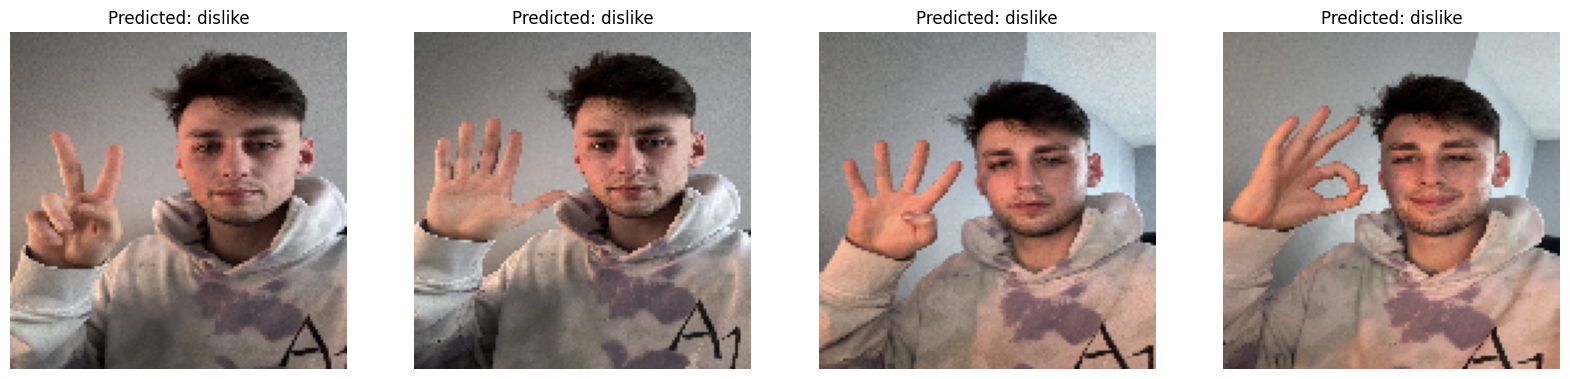

In [12]:
from tensorflow.keras.models import load_model

# Load your model
model_path = '/content/gdrive/My Drive/model/custom_cnn_with_augmentation.h5'
model = load_model(model_path)

# Process each image (assuming 'preprocess_image' is correctly defined and used)
processed_images = [preprocess_image(image) for image in gesture_images]

# Make predictions
predictions = [model.predict(img) for img in processed_images]
predicted_indices = [np.argmax(pred, axis=1)[0] for pred in predictions]  # Get predicted class indices

# Map indices to class names
predicted_class_names = [class_names[idx] for idx in predicted_indices]

# Print each image path with its predicted class name
for image_path, class_name in zip(gesture_images, predicted_class_names):
    print(f"{image_path}: Predicted Class - {class_name}")

    import matplotlib.pyplot as plt

# Set up the plot
fig, axs = plt.subplots(1, len(gesture_images), figsize=(20, 5))  # Adjust figure size as necessary

# Loop through images and display each one with its prediction
for i, img_path in enumerate(gesture_images):
    img = load_img(img_path, target_size=(128, 128))
    axs[i].imshow(img)
    axs[i].set_title(f"Predicted: {predicted_class_names[i]}")
    axs[i].axis('off')  # Hide axes

plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

def preprocess_image(image_path, target_size=(128, 128)):
    img = load_img(image_path, target_size=target_size, color_mode='grayscale')
    img = img_to_array(img)
    img /= 255.0
    img = np.expand_dims(img, axis=0)
    return img

# Process each image
processed_images = [preprocess_image(image) for image in gesture_images]

1/1 [==============================] - 0s 22ms/step
/content/gdrive/My Drive/gestures/IMG_1538.jpg: Predicted Class - four
/content/gdrive/My Drive/gestures/IMG_1539.jpg: Predicted Class - four
/content/gdrive/My Drive/gestures/IMG_1540.jpg: Predicted Class - four
/content/gdrive/My Drive/gestures/IMG_1541.jpg: Predicted Class - four


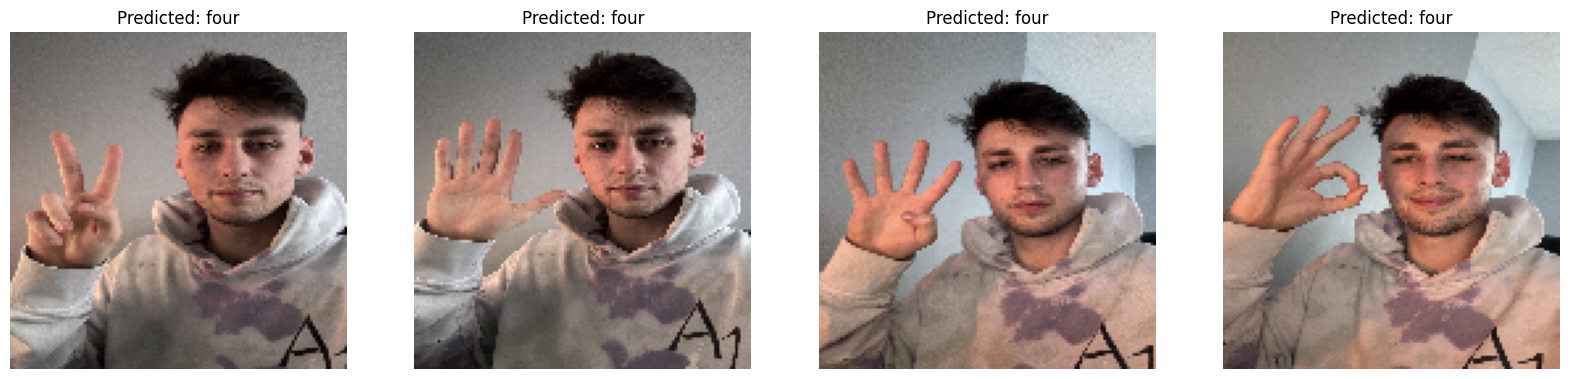

In [ ]:
from tensorflow.keras.models import load_model

# Load your model
model_path = '/content/gdrive/My Drive/model/grey_scale_cnn.h5'
model = load_model(model_path)

# Process each image (assuming 'preprocess_image' is correctly defined and used)
processed_images = [preprocess_image(image) for image in gesture_images]

# Make predictions
predictions = [model.predict(img) for img in processed_images]
predicted_indices = [np.argmax(pred, axis=1)[0] for pred in predictions]  # Get predicted class indices

# Map indices to class names
predicted_class_names = [class_names[idx] for idx in predicted_indices]

# Print each image path with its predicted class name
for image_path, class_name in zip(gesture_images, predicted_class_names):
    print(f"{image_path}: Predicted Class - {class_name}")


import matplotlib.pyplot as plt

# Set up the plot
fig, axs = plt.subplots(1, len(gesture_images), figsize=(20, 5))  # Adjust figure size as necessary

# Loop through images and display each one with its prediction
for i, img_path in enumerate(gesture_images):
    img = load_img(img_path, target_size=(128, 128))
    axs[i].imshow(img)
    axs[i].set_title(f"Predicted: {predicted_class_names[i]}")
    axs[i].axis('off')  # Hide axes

plt.show()